In [15]:
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import lzma
import sys
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})

plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [2]:
os.chdir("../")

import cpt_optimisation
from utils import get_community_project_costs
from model_alternate import simulation

In [3]:
folders = [x for x in os.listdir("DATA/") if "DS_" not in x and "sh" not in x]
folders = sorted(folders, key=lambda x: int(x.split("_")[-1]))
num_agents = 1225

In [4]:
AP = []
SR = []

for seed_folder in folders:

    seed = int(seed_folder.split("_")[-1])
    files = os.listdir(f"DATA/{seed_folder}")
    files = sorted(files, key=lambda x: int(x.split("_")[1]))
    
    for f in tqdm(files):        
        param_idx = int(f.split("_")[1]) - 1
        data = pickle.load(lzma.open(f"DATA/{seed_folder}/{f}"))
        data_W = data["W"]

        # determine regime
        prop_richer = sum(data_W[-1] > data_W[0]) / num_agents
        if prop_richer == 0:
            AP.append(f)
        elif prop_richer < 1:
            SR.append(f)
        
        if len(AP) >= 30 and len(SR) >= 30:
            break

  0%|          | 0/7168 [00:00<?, ?it/s]

# All Poor Intervention

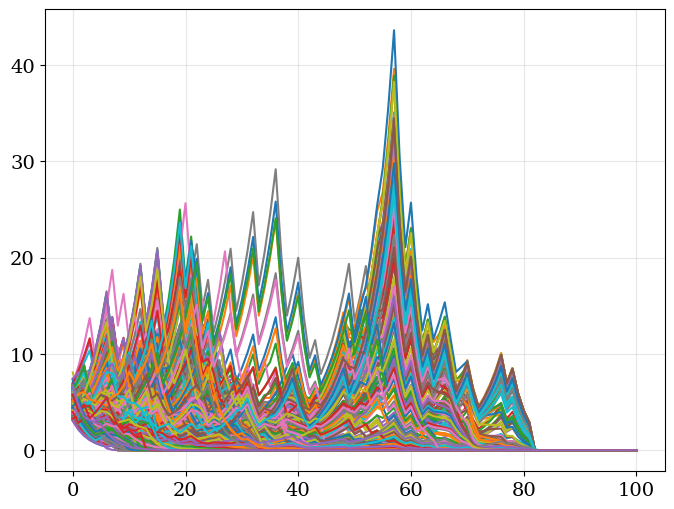

(0.0815283203125, 1.709228515625, 0.746240234375, 0.3917724609375, 11.3212890625)


In [34]:
data = pickle.load(lzma.open(f"DATA/new_model_runs_paper_0/{AP[1]}"))
plt.plot(data["W"])
plt.show()
print(data["params"])

In [35]:
with open("sda_graphs/0_11.3212890625.pickle", "rb") as f:
    communities, community_membership, augmented_communities, initial_wealth = pickle.load(f)
row = data["params"]
project_costs = get_community_project_costs(initial_wealth, augmented_communities, row[0])

In [36]:
AP_INTERVENTION_RESULTS = []
for seed in range(20):
    W, I, C, O, A, U, P, T, poorest_idx = simulation (
        STEPS=200,
        COMMUNITIES=communities,
        COMMUNITY_MEMBERSHIP=community_membership,
        SEED=seed,
        PROJECT_COSTS=project_costs,
        GAIN_RIGHT=row[1],
        SAVING_PROP=row[2],
        PROB_LEFT=row[3],
        INIT_WEALTH_VALUES=initial_wealth,
    )
    AP_INTERVENTION_RESULTS.append((W, poorest_idx))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:05<00:00,  1.08it/s]


In [37]:
with open("ap_intervention_results", "wb") as f:
    pickle.dump(AP_INTERVENTION_RESULTS, f)

# Some Rich Intervention

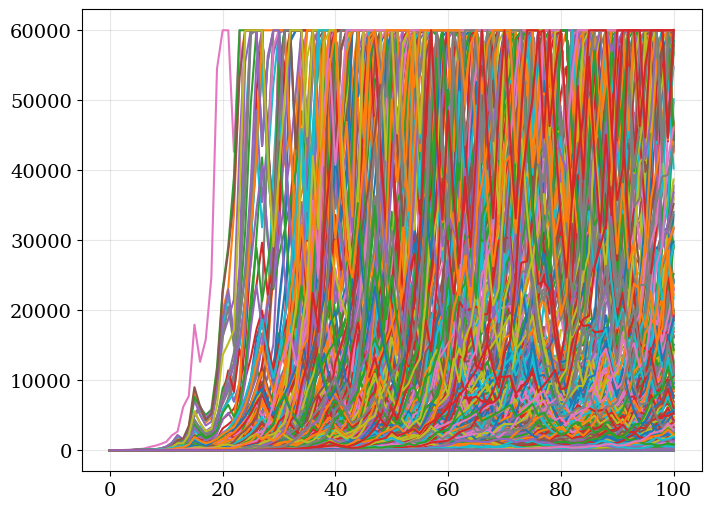

(0.0102783203125, 4.071728515625, 0.744775390625, 0.3730224609375, 7.5712890625)


In [23]:
data = pickle.load(lzma.open(f"DATA/new_model_runs_paper_0/{SR[0]}"))
plt.plot(data["W"])
plt.show()
print(data["params"])

In [24]:
with open("sda_graphs/0_7.5712890625.pickle", "rb") as f:
    communities, community_membership, augmented_communities, initial_wealth = pickle.load(f)
row = data["params"]
project_costs = get_community_project_costs(initial_wealth, augmented_communities, row[0])

In [30]:
SR_INTERVENTION_RESULTS = []
for seed in range(20):
    W, I, C, O, A, U, P, T, poorest_idx = simulation (
        STEPS=200,
        COMMUNITIES=communities,
        COMMUNITY_MEMBERSHIP=community_membership,
        SEED=seed,
        PROJECT_COSTS=project_costs,
        GAIN_RIGHT=row[1],
        SAVING_PROP=row[2],
        PROB_LEFT=row[3],
        INIT_WEALTH_VALUES=initial_wealth,
    )
    SR_INTERVENTION_RESULTS.append((W, poorest_idx))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:20<00:00,  1.30s/it]


In [33]:
with open("sr_intervention_results", "wb") as f:
    pickle.dump(SR_INTERVENTION_RESULTS, f)

# Results

In [7]:
with open("ap_intervention_results", "rb") as f:
    AP_INTERVENTION_RESULTS = pickle.load(f)
with open("sr_intervention_results", "rb") as f:
    SR_INTERVENTION_RESULTS = pickle.load(f)

In [72]:
escaped_prop = []

for item in AP_INTERVENTION_RESULTS:
    threshold = np.sort(item[0][-1])[100].round(2)
    count = np.where(item[0][-1][item[1]].round(2)>threshold)[0]
    escaped_prop.append(len(count)/100)
    
escaped_prop

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [73]:
escaped_prop = []
for item in SR_INTERVENTION_RESULTS:
    threshold = np.sort(item[0][-1])[100].round(2)
    count = np.where(item[0][-1][item[1]].round(2)>threshold)[0]
    escaped_prop.append(len(count)/100)

In [74]:
np.mean(escaped_prop), np.std(escaped_prop)

(0.3235, 0.13161591849012796)

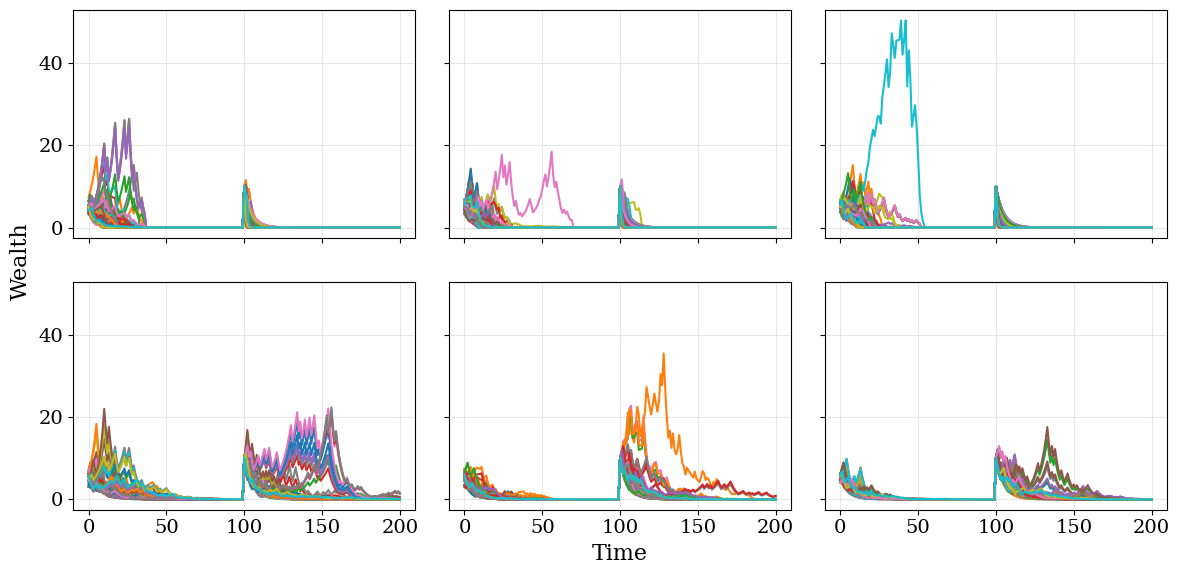

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(12,6), sharex=True, sharey=True)
for i,arr in enumerate([AP_INTERVENTION_RESULTS, SR_INTERVENTION_RESULTS]):
    for j in range(3, 6):
        axs[i][j-3].plot(arr[j][0][:,arr[j][1]])
        if i==1 and j==4:
            axs[i][j-3].set_xlabel("Time")
        if i == 0 and j == 3:
            axs[i][j-3].set_ylabel("Wealth")
            axs[i][j-3].yaxis.set_label_coords(-0.12, -0.1)

fig.tight_layout()
plt.savefig("interventions.pdf", bbox_inches="tight")
plt.show()